In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [49]:
data_train_path='Downloads/Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path='Downloads/Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path='Downloads/Fruits_Vegetables/Fruits_Vegetables/validation'

In [50]:
img_width=180
img_height=180

In [51]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 3117 files belonging to 36 classes.


In [52]:
data_cat=data_train.class_names

In [53]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [54]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,image_size=(img_height,img_width),batch_size=32,shuffle=False,validation_split=False)


Found 351 files belonging to 36 classes.


In [55]:
data_val=tf.keras.utils.image_dataset_from_directory(data_test_path,image_size=(img_height,img_width),batch_size=32,shuffle=False,validation_split=False)


Found 359 files belonging to 36 classes.


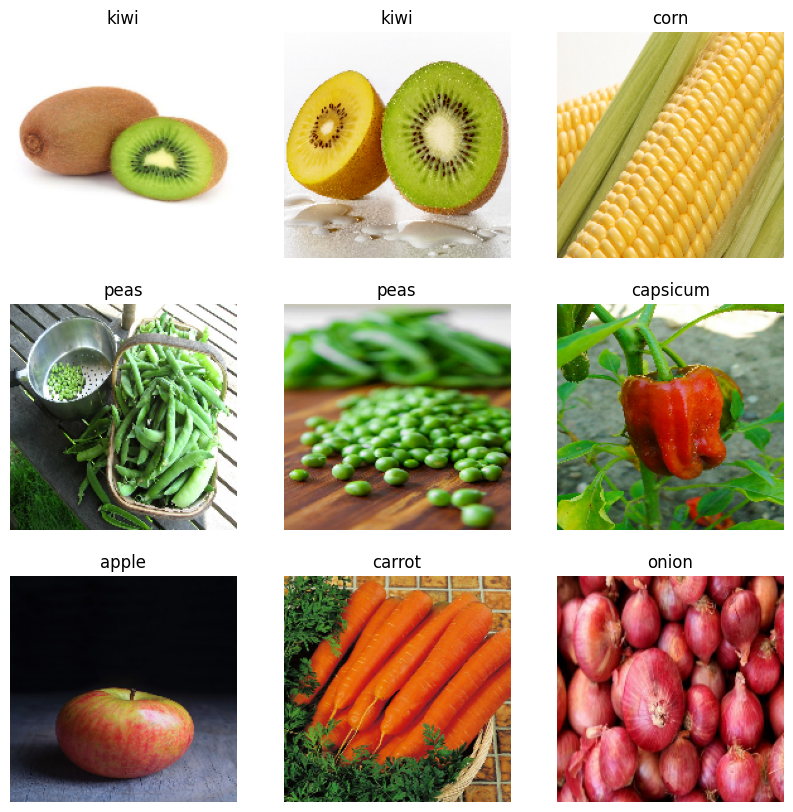

In [56]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

In [57]:
from tensorflow.keras.models import Sequential

In [58]:
model=Sequential([layers.Rescaling(1./255),layers.Conv2D(16,3,padding='same',activation='relu'),layers.MaxPooling2D(),layers.Conv2D(32,3,padding='same',activation='relu'),layers.MaxPooling2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),layers.MaxPooling2D(),layers.Flatten(),layers.Dropout(0.2),layers.Dense(128),layers.Dense(units=len(data_cat))])

In [59]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [60]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 320ms/step - accuracy: 0.0718 - loss: 3.7983 - val_accuracy: 0.4039 - val_loss: 2.3285
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 286ms/step - accuracy: 0.3180 - loss: 2.4707 - val_accuracy: 0.6156 - val_loss: 1.5147
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.4925 - loss: 1.7840 - val_accuracy: 0.7465 - val_loss: 0.9129
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.6727 - loss: 1.1066 - val_accuracy: 0.8969 - val_loss: 0.5613
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.8363 - loss: 0.6192 - val_accuracy: 0.9192 - val_loss: 0.5309
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.9045 - loss: 0.4018 - val_accuracy: 0.9471 - val_loss: 0.4576
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.9378 - loss: 0.2662 - val_accuracy: 0.9499 - val_loss: 0.4670
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.9519 - loss: 0.2267 - val_accu

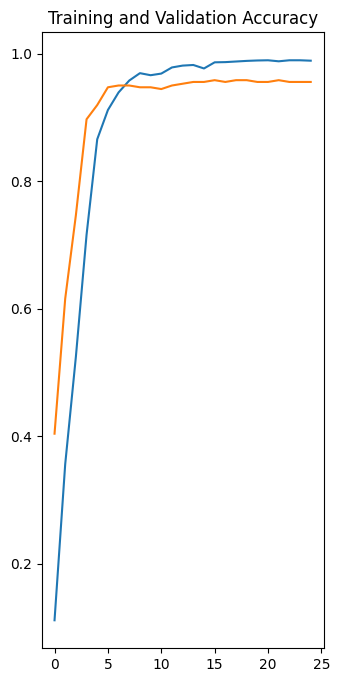

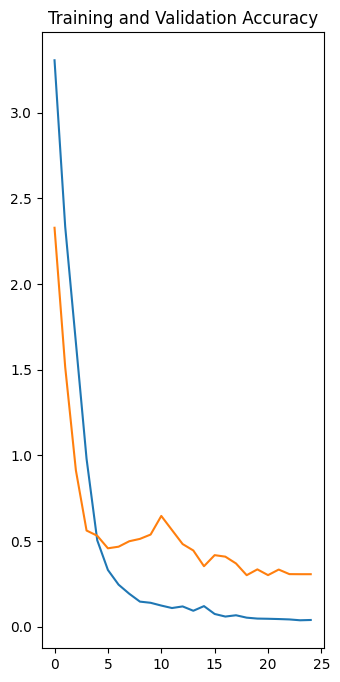

In [65]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['loss'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [104]:
image='Downloads/Chilli.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [105]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [106]:
score=tf.nn.softmax(predict)

In [107]:
print('Predicted Vegitable/Fruit is {}'.format(data_cat[np.argmax(score)]))

Predicted Vegitable/Fruit is chilli pepper


model.save('Image_classify.keras')

In [71]:
model.save('Image_classify.keras')